### I chose to work with World Development Indicators (WDI) dataset, the primary World Bank collection of development indicators, compiled from officially recognized international sources. It presents the most current and accurate global development data available (retrieved Oct 16, 2018). 


In [1]:

import pandas as pd

df = pd.read_csv('API_4_DS2_en_csv_v2_10136423.csv', skiprows=4, error_bad_lines=False)
(df.head())
import matplotlib.pyplot as plt
%matplotlib inline

    

In [8]:
# I chose 3 years from the dataset and include only the countries that have data for those years
_2007_2010_2013 = df[(df['2007'].isna() == False) & (df['2010'].isna() == False) & (df['2013'].isna() == False)]

In [9]:
# Display the first five entries for the reminding table
_2007_2010_2013.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Population ages 15-64 (% of total),SP.POP.1564.TO.ZS,53.669919,54.056784,54.383281,54.710292,55.119933,55.631102,...,69.161089,68.838092,68.882835,68.976476,69.090099,69.165181,69.159774,69.152468,69.003648,NaN
1,Aruba,ABW,Population ages 0-14 (% of total),SP.POP.0014.TO.ZS,43.847190,43.358346,42.925745,42.488756,41.950133,41.290098,...,20.947631,20.873619,20.533448,20.104897,19.614874,19.130979,18.703098,18.241400,17.911157,NaN
7,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.924670,6.712490,6.036870,6.549060,6.808060,6.162930,6.479060,NaN,NaN,NaN
8,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,21.537260,22.143660,21.745461,20.634081,21.874590,19.612720,22.854990,NaN,NaN,NaN
23,Aruba,ABW,"Tertiary education, academic staff (% female)",SE.TER.TCHR.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,52.380951,53.571430,53.947369,53.207550,53.508770,54.310341,61.627911,NaN,NaN,NaN


In [10]:
# I will be looking at the female unemployment rate (Unemployment, female (% of female labor force))
unemployed = _2007_2010_2013[_2007_2010_2013['Indicator Name'].str.contains("Unemployment") & _2007_2010_2013['Indicator Name'].str.contains("female")]
unemployed.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
162,Afghanistan,AFG,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.934000,12.401000,12.819000,12.574000,13.051000,13.288000,13.432000,13.016000,12.7060,NaN
320,Angola,AGO,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,12.865000,10.408000,7.702000,7.698000,7.693000,7.654000,7.619000,8.114000,8.6450,NaN
478,Albania,ALB,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,15.797000,13.701000,13.359000,12.737000,13.053000,15.112000,17.139000,14.549000,13.2840,NaN
794,Arab World,ARB,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.278082,19.400425,19.079012,19.640912,19.160631,19.101027,19.183521,19.061931,18.9097,NaN
952,United Arab Emirates,ARE,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,13.199000,11.768000,10.420000,9.210000,7.989000,6.838000,5.678000,4.598000,4.5940,NaN


In [18]:
# Create a new dataframe with the 4 columns I'd be using further
unemployed_df = unemployed[["Country Name", "2007", "2010", "2013"]]
unemployed_df.head()


,Country Name,2007,2010,2013
162,Afghanistan,12.863000,12.401000,13.051000
320,Angola,18.138000,10.408000,7.693000
478,Albania,13.229000,13.701000,13.053000
794,Arab World,17.206565,19.400425,19.160631
952,United Arab Emirates,9.020000,11.768000,7.989000


In [17]:
# Save the new dataset as CSV file
unemployed_df.to_csv('unemployed_years.csv', sep='\t', encoding='utf-8')

In [20]:
# The dataset column 'Country Names' includes other categories, so I decided to filter it for 
# 'country as a region that is identified as a distinct national entity in political geography'. 
plt_df["Country Name"].unique()



array(['Afghanistan', 'Angola', 'Albania', 'Arab World',
       'United Arab Emirates', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain',
       'Bahamas, The', 'Bosnia and Herzegovina', 'Belarus', 'Belize',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Ce

In [22]:
# List of countries from https://gist.github.com/kalinchernev/486393efcca01623b18d, used as 'countries.txt'
if __name__ == '__main__':
    df2 = pd.read_table('countries.txt', header=[0], delim_whitespace=True)
    print (df2.head())


       Country
0  Afghanistan
1      Albania
2      Algeria
3      Andorra
4       Angola


In [28]:
# Initially I planned to search for the countries/matches with FuzzyWuzzy Python library, 
# then decided it is not the best option for my purpose. But it is a fun library anyway! :)

# There is way easier way in this case

filtered_countries_unempl = plt_df.loc[plt_df['Country Name'].isin(df2['Country'])]
filtered_countries_unempl.head()

,Country Name,2007,2010,2013
162,Afghanistan,12.863,12.401000,13.051000
320,Angola,18.138,10.408000,7.693000
478,Albania,13.229,13.701000,13.053000
1110,Argentina,10.978,9.226000,8.506000
1268,Armenia,19.705,21.294001,18.132999


In [30]:
# Write the filtered dataset into CSV file for Female unemployment (%) in 2007, 2010, 2013.
filtered_countries_unempl.to_csv('filtered_unempl.csv', sep='\t', encoding='utf-8')

In [34]:
# Let's filter the data more. 
# I will only keep the countries where female unemployment was more than 20% for that year.
# This can be achieved by creating a mask that can be used then to hide all the other rows.
c1 = filtered_countries_unempl['2007'] < 20
c2 = filtered_countries_unempl ['2010'] < 20
c3 = filtered_countries_unempl['2013'] < 20

In [38]:
countries_20higher_2007 = filtered_countries_unempl.mask(c1).dropna(how='all')
countries_20higher_2010 = filtered_countries_unempl.mask(c2).dropna(how='all')
countries_20higher_2013 = filtered_countries_unempl.mask(c3).dropna(how='all')

In [40]:
# That is how it looks now:
countries_20higher_2013.head()

,Country Name,2007,2010,2013
4902,Botswana,20.138000,21.636000,21.445000
10748,Spain,10.702000,20.222000,26.671000
12328,Gabon,25.653999,29.108999,28.900999
13750,Greece,12.964000,16.375999,31.410000
18332,Jordan,23.139000,21.877001,22.240000


In [41]:
# As I am planning to plot the data, I will set the index of the dataframe to "Country Name". 

countries_20higher_2007.set_index("Country Name",drop=True,inplace=True)
countries_20higher_2010.set_index("Country Name",drop=True,inplace=True)
countries_20higher_2013.set_index("Country Name",drop=True,inplace=True)

c_2007 = countries_20higher_2007['2007'].sort_values()
c_2010 = countries_20higher_2010['2010'].sort_values()
c_2013 = countries_20higher_2013['2013'].sort_values()

# Things looking quite promising now! :)
c_2013.head()

Country Name
Namibia     20.656000
Botswana    21.445000
Jordan      22.240000
Tunisia     23.065001
Sudan       23.528000
Name: 2013, dtype: float64

Text(0.5, 0, 'Female Unempl. (%)')

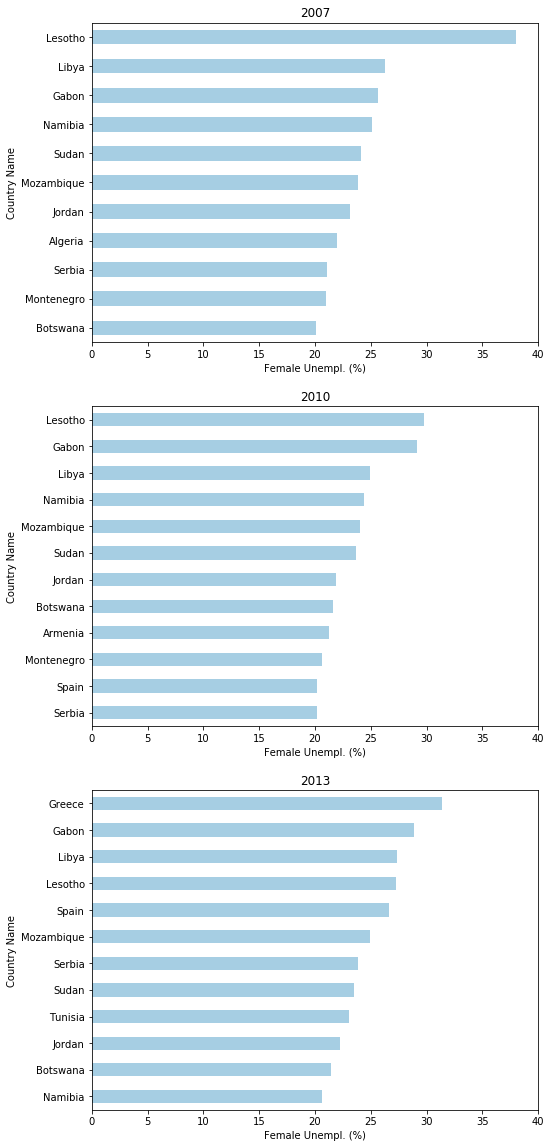

In [46]:
# I created 3 simple graphs for all the years, showing the countries 
# that had female unemployment rate (%) higher than 20% for that year.

fig, ax_array = plt.subplots(3, 1, figsize=(8,20))
(ax1, ax2, ax3) = ax_array
c_2007.plot(x=c_2007, kind='barh', ax=ax1, title='2007', xlim = (0, 40), colormap = 'Paired')
c_2010.plot(x=c_2010,  kind='barh', ax=ax2, title='2010', xlim = (0, 40), colormap = 'Paired')
c_2013.plot(x=c_2013,  kind='barh', ax=ax3, title='2013', xlim = (0, 40), colormap = 'Paired')

ax1.set_xlabel("Female Unempl. (%)")
ax2.set_xlabel("Female Unempl. (%)")
ax3.set_xlabel("Female Unempl. (%)")



Text(0.5, 0, 'Female Unempl. (%)')

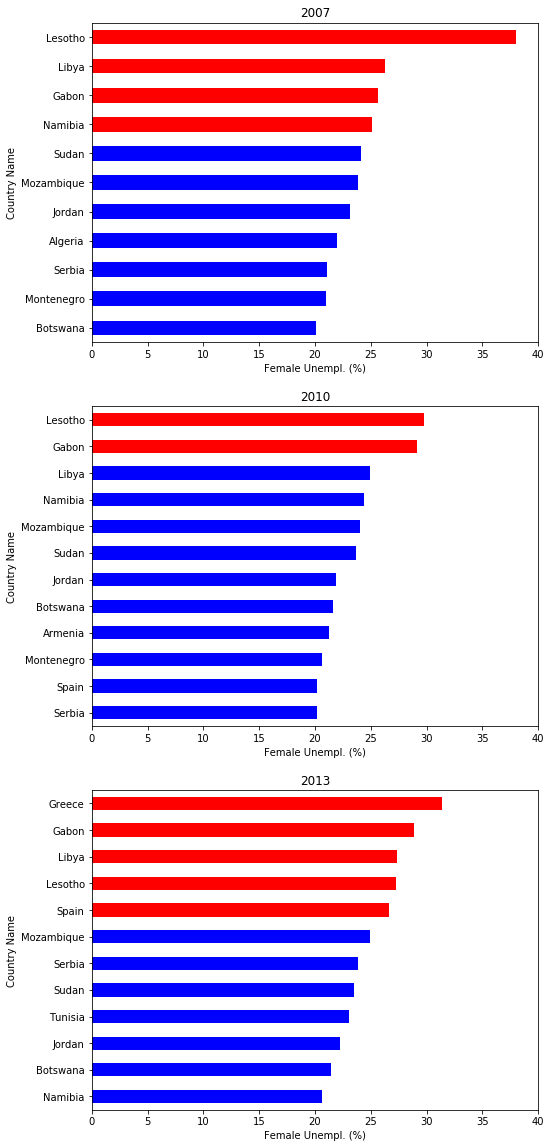

In [47]:
# That was already quite some fun exploration.
# Just wanted to add something that would bring out the countries 
# that have then unemployment rate higher/equal than 25%. 
# That turned out to be quite some searching around the interwebs, but finally I got what I needed!
# I went through some seaborn versions but it was not quite it.

import numpy as np 

col_2007 = np.where(c_2007<25, 'b', np.where(c_2007>=25, 'r', 'k'))
col_2010 = np.where(c_2010<25, 'b', np.where(c_2010>=25, 'r', 'k'))
col_2013 = np.where(c_2013<25,'b',np.where(c_2013>=25,'r','k'))

fig, ax_array = plt.subplots(3, 1, figsize=(8,20))
(ax1, ax2, ax3) = ax_array
c_2007.plot(x=c_2007, kind='barh', ax=ax1, title='2007', xlim = (0, 40), color = col_2007)
c_2010.plot(x=c_2010,  kind='barh', ax=ax2, title='2010', xlim = (0, 40), color = col_2010)
c_2013.plot(x=c_2013,  kind='barh', ax=ax3, title='2013', xlim = (0, 40), color = col_2013)

ax1.set_xlabel("Female Unempl. (%)")
ax2.set_xlabel("Female Unempl. (%)")
ax3.set_xlabel("Female Unempl. (%)")